In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from numba import njit, prange
import multiprocessing as mp

In [3]:
from analysis_routines import * 
from ploting_routines import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [4]:
temp, pres, date = load_time_series('processed/AGL_20181116_chain.nc')

In [5]:
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
df_c = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fc.csv')
df_s = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_s.csv')

In [6]:
em_ci = np.load(data_dir / 'SHDR_fit/aux/AGL_20181116_ci_fit_real_em.npy')
mld_thresh_i_02 = np.load(data_dir / 'SHDR_fit/aux/02_threshold_i_20181116.npy')

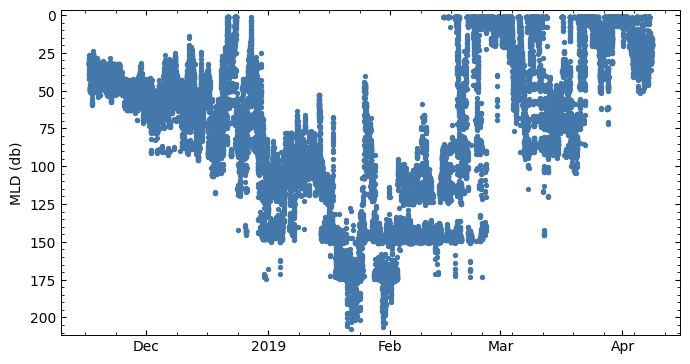

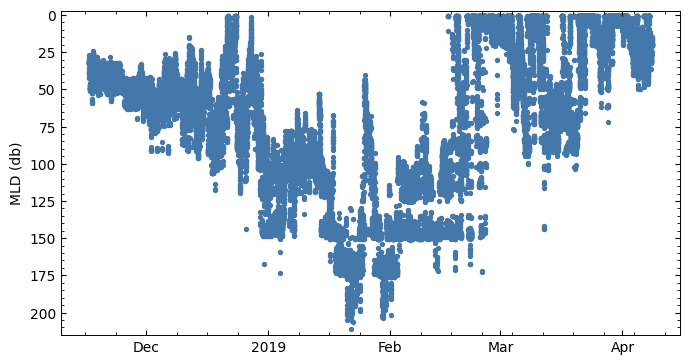

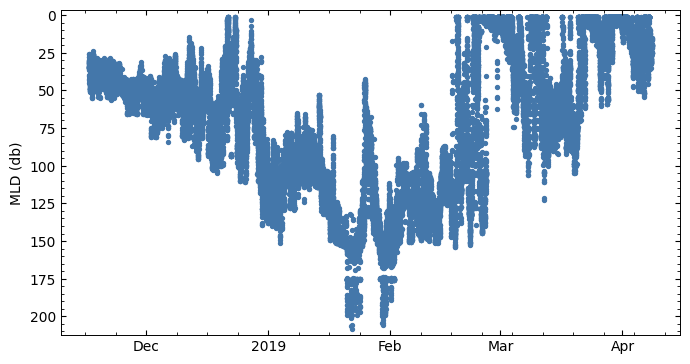

In [7]:
plot_fit_variable(df_s, 'D1', interval=timedelta(minutes=5))
plot_fit_variable(df_c, 'D1', interval=timedelta(minutes=5))
plot_fit_variable(df_ci, 'D1', interval=timedelta(minutes=5))

### Distance


In [8]:
dist_5_s = distance(df_s, 'D1', 1, 5)[1]
dist_10_s = distance(df_s, 'D1', 1, 10)[1]
dist_15_s = distance(df_s, 'D1', 1, 15)[1]
dist_5_c = distance(df_c, 'D1', 1, 5)[1]
dist_10_c = distance(df_c, 'D1', 1, 10)[1]
dist_15_c = distance(df_c, 'D1', 1, 15)[1]
dist_5_ci = distance(df_ci, 'D1', 1, 5)[1]
dist_10_ci = distance(df_ci, 'D1', 1, 10)[1]
dist_15_ci = distance(df_ci, 'D1', 1, 15)[1]

dist_5 = np.array([dist_5_s, dist_5_c, dist_5_ci])*100
dist_10 = np.array([dist_10_s, dist_10_c, dist_10_ci])*100
dist_15 = np.array([dist_15_s, dist_15_c, dist_15_ci])*100

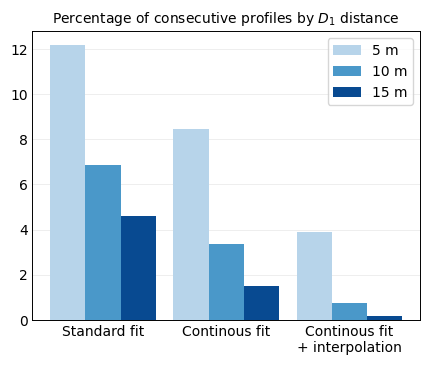

In [9]:
fig, ax = plt.subplots()
x = np.array([0, 1.4, 2.8])
bar_width = 0.4
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
b1 = ax.bar(x, dist_5, width=bar_width, label='5 m', color=colors[0])
b2 = ax.bar(x + bar_width, dist_10, width=bar_width, label='10 m', color=colors[1])
b3 = ax.bar(x + bar_width*2, dist_15, width=bar_width, label='15 m', color=colors[2])
ax.tick_params(which='both', bottom=False, left=False, right=False, top=False)
ax.set_axisbelow(True)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.legend()
ax.set_title('Percentage of consecutive profiles by $D_1$ distance')
plt.show()

In [9]:
def physical_RMS(loc):
    z = if_masked_to_array(pres[loc])
    y = if_masked_to_array(temp[loc])
    fitnes = np.sqrt(np.sum((y - fit_function(z, df_ci, loc))**2) / len(z))
    return fitnes


In [10]:
a = np.where(em_ci > df_s['em'])[0]
print(len(a)/len(date))

0.9482578395097451


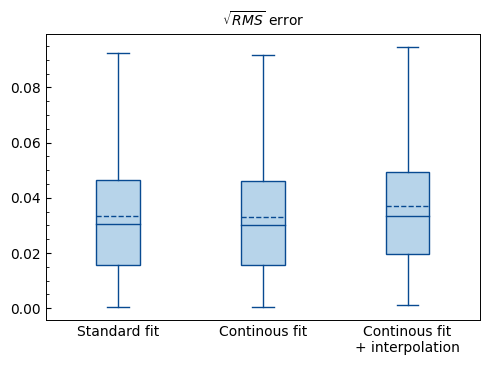

In [48]:
fig, ax = plt.subplots()
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
bp = ax.boxplot([df_s['em'], df_c['em'], em_ci], showfliers=False, patch_artist=True, meanline=True, showmeans=True, 
                boxprops=dict(facecolor=colors[0], color=colors[2]), 
                medianprops=dict(color=colors[2]), 
                meanprops=dict(color=colors[2]),
                capprops=dict(color=colors[2]),
                whiskerprops=dict(color=colors[2]))
                
ax.tick_params(which='both', bottom=False, right=False, top=False)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.set_title(r'$\sqrt{RMS}$ error')
fig.tight_layout()
plt.show()

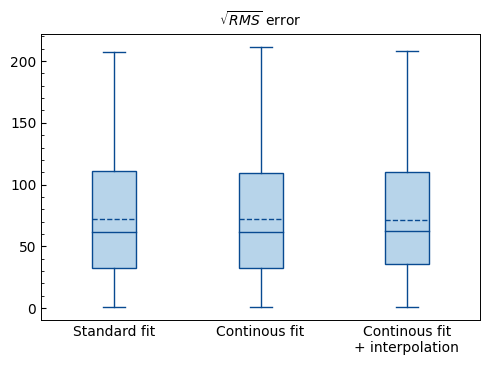

In [13]:
fig, ax = plt.subplots()
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
bp = ax.boxplot([df_s['D1'], df_c['D1'], df_ci['D1']], showfliers=True, patch_artist=True, meanline=True, showmeans=True, 
                boxprops=dict(facecolor=colors[0], color=colors[2]), 
                medianprops=dict(color=colors[2]), 
                meanprops=dict(color=colors[2]),
                capprops=dict(color=colors[2]),
                whiskerprops=dict(color=colors[2]))
                
ax.tick_params(which='both', bottom=False, right=False, top=False)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.set_title(r'$\sqrt{RMS}$ error')
fig.tight_layout()
plt.show()

In [30]:
s_thrs = abs(df_s['D1'] - mld_thresh_i_02)
c_thrs = abs(df_c['D1'] - mld_thresh_i_02)
ci_thrs = abs(df_ci['D1'] - mld_thresh_i_02)
D1_vs_thrs = [s_thrs, c_thrs, ci_thrs]

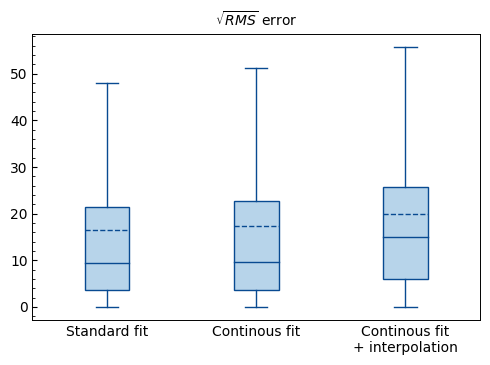

In [33]:
fig, ax = plt.subplots()
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
bp = ax.boxplot(D1_vs_thrs, showfliers=False, patch_artist=True, meanline=True, showmeans=True, 
                boxprops=dict(facecolor=colors[0], color=colors[2]), 
                medianprops=dict(color=colors[2]), 
                meanprops=dict(color=colors[2]),
                capprops=dict(color=colors[2]),
                whiskerprops=dict(color=colors[2]))
                
ax.tick_params(which='both', bottom=False, right=False, top=False)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.set_title(r'$\sqrt{RMS}$ error')
fig.tight_layout()
plt.show()

In [10]:
QI_ci = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_ci_20181116.npy')
QI_ci_i = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_ci_i_20181116.npy')
QI_c = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_c_20181116.npy')
QI_s = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_s_20181116.npy')
QI_s_i = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_s_i_20181116.npy')


[ 439935  439936  439938 ... 2461739 2461740 2461741]
0.7999660913966352
0.8106200357483471
0.8309421209109198
0.8388308690230446
0.8306542606725721


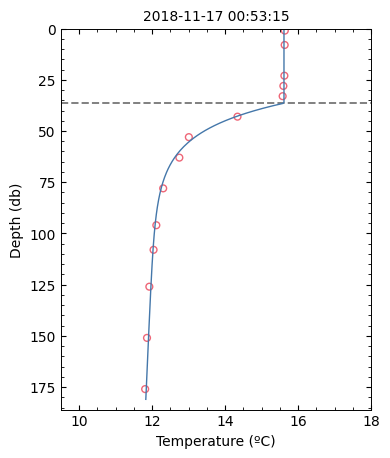

In [22]:
nan_locs = np.squeeze(np.argwhere(np.isnan(QI_ci)))
print(nan_locs)
print(np.nanmean(QI_ci[:2000000]))
print(np.nanmean(QI_ci_i[:2000000]))
print(np.nanmean(QI_c[:2000000]))
print(np.nanmean(QI_s[:2000000]))
print(np.nanmean(QI_s_i[:2000000]))


plot_profile_fit(df_s, temp, pres, 9999)

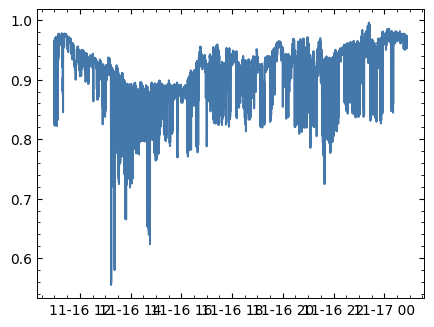

In [14]:
plt.plot(date[:10000], QI_s_i[:10000])

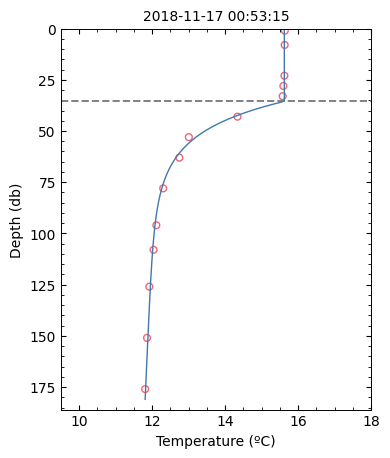

[15.6356 15.6322 15.6242 15.5965 15.5766 14.3398 13.0076 12.7474 12.3044
 12.117  12.0411 11.9255 11.8615 11.8105]
[  1   8  13  18  23  28  33  38  43  48  53  58  63  68  73  78  84  90
  96 102 108 114 120 126 131 136 141 146 151 156 161 166 171 176]
[ 1  8 13 18 23 28 33] [15.64422163 15.64762999 15.11274653 13.56284788 12.80013694 12.63266747
 12.46370498]
[ 1  8 13 18 23 28 33 38 43 48 53] [15.64422163 15.64762999 15.11274653 13.56284788 12.80013694 12.63266747
 12.46370498 12.19070175 12.14190338 12.08326689 11.99823999]
1.3981536857179513 1.3370695125208327
0.04368916938179934


In [90]:
a = np.where(QI_ci_i < 0)[0]
loc = 9999
plot_profile_fit(df_ci, temp, pres, loc)


def quality_index(MLD, y, z, interpolation=False):
    z = if_masked_to_array(z)
    y = if_masked_to_array(y)
    print(y)
    if interpolation:      
        zz = np.array([13, 18, 38, 48, 58, 68, 73, 84, 90, 102, 114, 
                    120, 131, 136, 141, 146, 156, 161, 166, 171])
        z, y = interpolate(z, y, zz, True)
        print(z)
        
    idx_MLD = np.searchsorted(z, MLD)
    z_ML = z[:idx_MLD]
    y_ML = y[:idx_MLD]
    print(z_ML, y_ML)
    idx_1_5_MLD = np.searchsorted(z, 1.5*MLD)
    
    if idx_1_5_MLD == len(z) or idx_1_5_MLD==idx_MLD or idx_MLD==0:
        return np.nan

    z_1_5 = z[:idx_1_5_MLD]
    y_1_5 = y[:idx_1_5_MLD]
    
    print(z_1_5, y_1_5)
    print(np.std(y_1_5), np.std(y_ML))
    return 1 - np.std(y_ML)/np.std(y_1_5)
print(quality_index(df_ci['D1'][loc], temp[loc], pres[loc], True))

In [61]:
Q_I_s = np.array([quality_index(df_s.loc[i, 'D1'], temp[i], pres[i]) for i in range(len(date[:40000]))])
Q_I_si = np.array([quality_index(df_s.loc[i, 'D1'], temp[i], pres[i], interpolation=True) for i in range(len(date[:4000]))])
Q_I_cii = np.array([quality_index(df_ci.loc[i, 'D1'], temp[i], pres[i], interpolation=True) for i in range(len(date[:4000]))])


In [62]:
print(np.mean(Q_I_cii))
print(np.mean(Q_I_si))
print(np.mean(Q_I_s))
print(np.mean(Q_I))

0.9694397183711655
0.9542517862548537
0.9386541078956597
0.8372301461414916
